In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import random

## Q1 a)

In [4]:
meas.shape

(150, 4)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#%matplotlib notebook

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = meas[:, 0]
y = meas[:, 1]
z = meas[:, 2]

ax.scatter(x,y,z, marker='o')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

N_POINTS = 30
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 5
my_randoms = random.sample(range(150), N_POINTS)

# Randomly select N points
xs = meas[my_randoms, 0]
ys = meas[my_randoms, 1]
zs = meas[my_randoms, 2]

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='orange')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

<Figure size 800x600 with 1 Axes>

## Q2 a)

In [57]:
df = sio.loadmat("jesterdata.mat")
X = df["X"]

In [52]:
new = sio.loadmat("newuser.mat")

In [53]:
truey = new['truey']
y = new['y']

In [54]:
truey.shape

(100, 1)

In [55]:
y.shape

(100, 1)

In [58]:
X

array([[ 4.08, -6.17,  6.84, ..., -0.29,  4.17,  0.44],
       [-0.29, -3.54,  3.16, ..., -0.29,  4.17,  7.43],
       [ 6.36,  0.44,  9.17, ..., -0.29,  9.03,  9.08],
       ...,
       [ 0.34, -9.08, -0.05, ...,  1.46, -0.29,  8.69],
       [-4.32, -5.05,  1.31, ..., -0.29, -0.29,  8.79],
       [ 1.07, -3.45,  0.  , ..., -0.68,  4.37,  7.43]])

In [12]:
np.where( y != -99)[0]

array([ 0,  2,  8, 12, 14, 16, 17, 23, 33, 35, 38, 40, 43, 45, 52, 53, 54,
       55, 56, 68, 79, 88, 89, 94, 98])

In [13]:
knowny = truey[np.where( y != -99)[0]]

In [14]:
trainx = X[np.where( y != -99)[0],:20]

In [15]:
testx = X[np.where( y == -99)[0],:20]

In [16]:
trainx.shape

(25, 20)

In [17]:
def weights(X, y):
    XT = np.transpose(X)
    A = np.dot(XT, X)
    AI = np.linalg.inv(A)
    p = np.dot(AI, XT)
    w = np.dot(p, y)
    return w

In [18]:
w = weights(trainx, knowny)
w

array([[-0.0188266 ],
       [-0.21415528],
       [ 0.03641398],
       [-0.29992998],
       [-0.31056549],
       [ 0.1630871 ],
       [-0.18227543],
       [ 0.24762305],
       [-0.11671593],
       [-0.06019925],
       [ 0.11741421],
       [ 0.08964047],
       [-0.11730157],
       [-1.50206332],
       [ 0.12828402],
       [ 0.28638529],
       [ 0.44663504],
       [-0.2572333 ],
       [ 0.097289  ],
       [ 0.3309138 ]])

In [19]:
yhat = np.dot(testx, w)

In [20]:
testy = truey[np.where( y == -99)[0]]

In [21]:
#Find the row index of the user's favourite joke 
np.where(testy == np.amax(testy))[0]

array([20])

In [22]:
np.where(yhat == np.amax(yhat))[0]

array([34])

In [23]:
def accuracy(yhat, y):
    yh = (np.where(yhat>0, 1, -1)) 
    ty = (np.where(y>0, 1, -1)) 
    dta = yh - ty
    acc = 1-dta[np.where(dta!=0)].shape[0]/dta.shape[0]
    return acc

In [24]:
#Calculating the accuracy score
accuracy(yhat, testy)

0.6

## Q2 b)

In [25]:
trainx1 = X[np.where( y != -99)[0],:]
testx1 = X[np.where( y == -99)[0],:]

In [26]:
wt = weights(trainx1, knowny)
wt

array([[-2506.51551331],
       [-2571.73939026],
       [ -206.8882312 ],
       ...,
       [  127.06857178],
       [  104.5945919 ],
       [  -74.65979919]])

In [27]:
yhat1 = np.dot(testx1, wt)

In [28]:
#Find the row index of the user's favourite joke 
np.where(testy == np.amax(testy))[0]

array([20])

In [29]:
#Calculating the accuracy score
accuracy(yhat1, testy)

0.4933333333333333

In [30]:
np.where(yhat1 == np.amax(yhat1))[0]

array([19])

## Q2 d)

In [2]:
X = np.array([[2.63,2.23,2.63], [2.78,1.87,2.78], [3.03,3.46,3.03], [3.10,3.67,3.10]])

In [37]:
x  = np.array([[1,2,3,4],[1,2,3,4], [1,2,3,4], [1,2,3,4]])

In [39]:
x

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [62]:
#Reconstruction based on reduced SVD
U, s, Vt = np.linalg.svd(X, full_matrices=False)

In [63]:
U.shape, s.shape, Vt.shape

((100, 100), (100,), (100, 7200))

In [64]:
Vt.T

array([[-9.88451426e-03, -1.64274559e-02,  2.30873227e-03, ...,
        -2.08341192e-02, -2.82713760e-03, -1.35628244e-02],
       [ 1.87234789e-02,  1.44736507e-02, -1.69440535e-03, ...,
         1.84106623e-02, -6.07588591e-03,  8.87908120e-03],
       [ 7.98355445e-03,  1.59091938e-02,  9.38642179e-03, ...,
        -1.10098689e-02,  8.68450782e-03,  2.21376574e-02],
       ...,
       [-2.37169672e-03,  1.51341542e-03, -6.73473379e-03, ...,
        -7.26571378e-04,  2.17011906e-03,  4.34433775e-05],
       [-1.01098581e-02,  1.60189510e-02,  1.51083944e-02, ...,
         9.72975288e-03,  8.57005486e-03,  2.62765076e-02],
       [-1.44847977e-02,  1.17280572e-02, -6.82434745e-03, ...,
         7.12640823e-03,  1.77461368e-02,  2.67274183e-02]])

In [65]:
S = np.diag(s)
S

array([[2420.05555211,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 1363.15642617,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  885.9886694 , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  248.02912983,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         245.04532995,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  235.99487875]])

In [49]:
U

array([[-0.5       , -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.16666667, -0.16666667,  0.83333333],
       [-0.5       ,  0.83333333, -0.16666667, -0.16666667],
       [-0.5       , -0.16666667,  0.83333333, -0.16666667]])

In [51]:
2*np.sqrt(30)

10.954451150103322

In [33]:
B = U[:,0]

In [34]:
np.dot(B, X.T)

array([-4.32441236, -4.28984646, -5.49631114, -5.69836311])

In [25]:
np.dot(S, Vt)[0]

array([-4.32441236, -4.28984646, -5.49631114, -5.69836311])

In [36]:
np.allclose(X, np.dot(U, np.dot(S, Vt)))

ValueError: shapes (3,3) and (4,4) not aligned: 3 (dim 1) != 4 (dim 0)

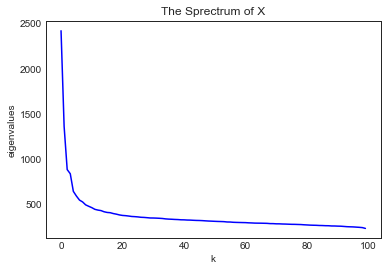

In [46]:
fig, axes = plt.subplots()

xx = np.linspace(0,99,100)

axes.plot(xx, s, 'b')
axes.set_xlabel('k')
axes.set_ylabel('eigenvalues')
axes.set_title('The Sprectrum of X');

## Q2 e)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1', 'PCA2'])

In [36]:
ty = (np.where(truey>0, 1, 0)) 
target = pd.DataFrame(ty, columns = ['target'])

In [37]:
# make it numeric for coloring
target['target']=pd.Categorical(target['target'])
my_color=target['target'].cat.codes

In [51]:
result = pd.concat([principalDf, target], axis = 1)

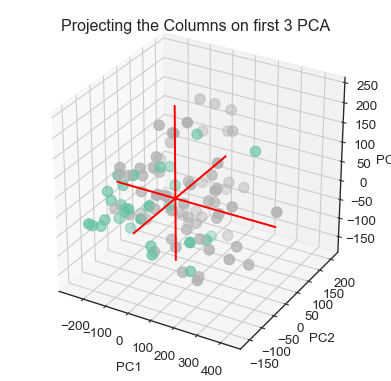

In [39]:
# libraries
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("white")
 
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
   
# Plot initialisation
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Projecting the Columns on first 3 PCA")
plt.show()

In [40]:
XT = np.transpose(X)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(XT)
pdf = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1', 'PCA2'])

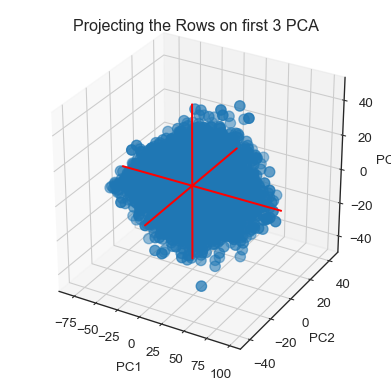

In [50]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
   
# Plot initialisation
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pdf['PCA0'], pdf['PCA1'], pdf['PCA2'],  cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pdf['PCA0']), max(pdf['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pdf['PCA1']), max(pdf['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pdf['PCA2']), max(pdf['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Projecting the Rows on first 3 PCA")
plt.show()

## Q2 f)

In [69]:
def power_iteration(A, num_simulations):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

In [89]:
#Computer the first column of U
A=np.dot(X,XT)

In [91]:
power_iteration(A, 10)

array([ 8.39154804e-02,  8.38823641e-02,  8.54325472e-02,  6.35931684e-02,
        6.42404813e-02,  1.21792300e-01,  4.55576833e-02,  2.16783116e-02,
        7.56796236e-02,  9.31396030e-02,  1.16889909e-01,  1.22212407e-01,
        1.00145356e-02,  1.21262705e-01,  3.40281491e-05, -2.11044542e-02,
        2.52316911e-02,  3.46944829e-02,  6.76257153e-02,  5.12292964e-02,
        1.25406018e-01,  1.04763992e-01,  8.92867899e-02,  4.90209207e-02,
        9.73079707e-02,  1.15739294e-01,  1.27730265e-01,  1.18599294e-01,
        1.17784817e-01,  9.20238948e-02,  1.21166754e-01,  1.26186389e-01,
        6.31026779e-02,  1.05205378e-01,  1.27969612e-01,  1.20640853e-01,
        4.92773890e-02,  1.06062884e-01,  1.12195464e-01,  1.05564936e-01,
        8.64846717e-02,  1.21602840e-01,  6.66362971e-02,  2.31461910e-02,
        1.08525035e-01,  1.07900651e-01,  1.21017045e-01,  1.14988309e-01,
        1.30331467e-01,  1.28904606e-01,  8.90471232e-02,  9.88868789e-02,
        1.25061660e-01,  

In [97]:
U[:,0]

array([-8.39153673e-02, -8.38822413e-02, -8.54323040e-02, -6.35926627e-02,
       -6.42404239e-02, -1.21792344e-01, -4.55574926e-02, -2.16781396e-02,
       -7.56792056e-02, -9.31395173e-02, -1.16889959e-01, -1.22212463e-01,
       -1.00142250e-02, -1.21262754e-01, -3.36848211e-05,  2.11050469e-02,
       -2.52314912e-02, -3.46942595e-02, -6.76256096e-02, -5.12290309e-02,
       -1.25406192e-01, -1.04763871e-01, -8.92865334e-02, -4.90203295e-02,
       -9.73078233e-02, -1.15739354e-01, -1.27730635e-01, -1.18599334e-01,
       -1.17785193e-01, -9.20235268e-02, -1.21166987e-01, -1.26186750e-01,
       -6.31021765e-02, -1.05205333e-01, -1.27969962e-01, -1.20641252e-01,
       -4.92769067e-02, -1.06062853e-01, -1.12195445e-01, -1.05564861e-01,
       -8.64843424e-02, -1.21602989e-01, -6.66358291e-02, -2.31455582e-02,
       -1.08525008e-01, -1.07900738e-01, -1.21017098e-01, -1.14988414e-01,
       -1.30331762e-01, -1.28905063e-01, -8.90467848e-02, -9.88866524e-02,
       -1.25062001e-01, -

In [98]:
#Compute the first column of V
B=np.dot(XT,X)

In [99]:
power_iteration(B, 10)

array([ 0.0098843 , -0.01872329, -0.00798335, ...,  0.00237172,
        0.01011007,  0.01448495])

In [102]:
V[0,:]

array([-0.00988451,  0.01872348,  0.00798355, ..., -0.0023717 ,
       -0.01010986, -0.0144848 ])

## Q3 a)

In [106]:
face = sio.loadmat("face_emotion_data.mat")
fx = face["X"]
fy = face["y"]

In [108]:
fx.shape

(128, 9)

In [276]:
def pseudo_inverse(x, y, k):
    u, S, vt= np.linalg.svd(x, full_matrices=False)
    s = np.diag(S)
    s = s[:,:k]
    z = np.zeros((x.shape[1], x.shape[1]-k))
    s = np.concatenate((s, z), axis=1)
    ps = np.linalg.pinv(s)
    v = np.transpose(vt)
    tmp = np.dot(v, ps)
    w = np.dot(tmp, np.transpose(u))
    w = np.dot(w, y)
    return w

In [278]:
for i in range(1,10):
    print("k =", i)
    print(pseudo_inverse(fx, fy, i))
    print('')

k = 1
[[0.07732978]
 [0.07969754]
 [0.07904875]
 [0.0816781 ]
 [0.06705992]
 [0.06707937]
 [0.07527837]
 [0.07160089]
 [0.06155219]]

k = 2
[[ 0.10126696]
 [ 0.19553442]
 [ 0.19964952]
 [ 0.18936603]
 [-0.00436046]
 [-0.01282349]
 [-0.00742181]
 [-0.01826755]
 [-0.04571585]]

k = 3
[[ 0.10454244]
 [ 0.18510821]
 [ 0.20195782]
 [ 0.1860365 ]
 [ 0.08037898]
 [ 0.06660239]
 [-0.05995717]
 [-0.07183521]
 [-0.08719376]]

k = 4
[[ 0.6987954 ]
 [ 0.03741742]
 [ 0.13744234]
 [ 0.00388407]
 [ 0.06659998]
 [-0.01852797]
 [-0.00610756]
 [ 0.11975515]
 [-0.49891542]]

k = 5
[[ 0.96204701]
 [-0.01304491]
 [ 0.15889209]
 [-0.05965915]
 [ 0.06331968]
 [-0.10854756]
 [-0.17773001]
 [-0.07436163]
 [-0.17015576]]

k = 6
[[ 0.97215471]
 [-0.01724239]
 [ 0.15966609]
 [-0.06349738]
 [ 0.02658444]
 [-0.07332142]
 [-0.1328938 ]
 [-0.11970597]
 [-0.17377493]]

k = 7
[[ 0.97577183]
 [-0.01637946]
 [ 0.1636293 ]
 [-0.06512901]
 [-0.02319511]
 [-0.0236024 ]
 [-0.1781614 ]
 [-0.08510611]
 [-0.16719713]]

k = 8
[[

## Q3 b)

In [291]:
def rlsq_solution(X, y, l):
    n, m = X.shape
    I = np.identity(m)
    w = np.dot(np.dot(la.inv(np.dot(X.T, X) + l*I), X.T), y)
    return w

In [293]:
lam = [0, 0.5, 1, 2, 4, 8, 16]

In [294]:
for l in lam:
    print('lamda =', l)
    print(rlsq_solution(fx, fy, l))
    print('')

lamda = 0
[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]

lamda = 0.5
[[ 0.93953626]
 [ 0.17006592]
 [ 0.2561154 ]
 [-0.33529569]
 [-0.0062211 ]
 [-0.01958902]
 [-0.16559785]
 [-0.08099307]
 [-0.1669776 ]]

lamda = 1
[[ 0.93457023]
 [ 0.14090751]
 [ 0.24737251]
 [-0.2944883 ]
 [-0.00630791]
 [-0.02099093]
 [-0.16458206]
 [-0.07988943]
 [-0.16741668]]

lamda = 2
[[ 0.9232887 ]
 [ 0.10507775]
 [ 0.23362318]
 [-0.2391671 ]
 [-0.00537702]
 [-0.02289921]
 [-0.16209171]
 [-0.07791205]
 [-0.16809353]]

lamda = 4
[[ 0.89873007]
 [ 0.07164363]
 [ 0.21558321]
 [-0.17656151]
 [-0.00196717]
 [-0.02494554]
 [-0.15644326]
 [-0.07428166]
 [-0.16888207]]

lamda = 8
[[ 0.85001138]
 [ 0.05044952]
 [ 0.19656559]
 [-0.11600669]
 [ 0.00526565]
 [-0.0260807 ]
 [-0.14524476]
 [-0.0676809 ]
 [-0.16895502]]

lamda = 16
[[ 0.76525938]
 [ 0.0456839 ]
 [ 0.1798923 ]
 [-0.06163023]
 [ 0.01591409]
 [-0.02420439]
 [-0.126419  ]


## Q3 c)

In [283]:
new = np.dot(fx, np.random.randn(9,3))

In [285]:
fxn = np.concatenate((fx, new), axis=1)

In [286]:
fxn.shape

(128, 12)

In [288]:
for i in range(1,13):
    print("k =", i)
    print(pseudo_inverse(fxn, fy, i))
    print('')

k = 1
[[ 0.0249778 ]
 [ 0.02549257]
 [ 0.02785837]
 [ 0.02652488]
 [ 0.02757875]
 [ 0.02462568]
 [ 0.00777087]
 [ 0.00659576]
 [ 0.00559859]
 [-0.0442828 ]
 [-0.02451441]
 [-0.12597733]]

k = 2
[[ 0.04142532]
 [ 0.04683356]
 [ 0.04698653]
 [ 0.04672079]
 [ 0.02176325]
 [ 0.01951108]
 [ 0.02991975]
 [ 0.03388027]
 [ 0.00637553]
 [-0.11410306]
 [-0.06089154]
 [-0.07773749]]

k = 3
[[ 0.03288534]
 [ 0.04742303]
 [ 0.05288777]
 [ 0.04401316]
 [-0.02267551]
 [-0.02187947]
 [-0.03082046]
 [-0.01953866]
 [-0.05919181]
 [-0.18062875]
 [-0.01799182]
 [-0.09081669]]

k = 4
[[ 0.08673741]
 [ 0.08687538]
 [ 0.09414993]
 [ 0.07872059]
 [-0.06002295]
 [-0.01855051]
 [-0.00610328]
 [ 0.00025545]
 [ 0.02088668]
 [-0.18647211]
 [ 0.12841007]
 [-0.08356381]]

k = 5
[[ 0.19437203]
 [-0.04622195]
 [-0.01238321]
 [-0.05248019]
 [-0.00807301]
 [ 0.0772177 ]
 [ 0.00106184]
 [ 0.07845413]
 [-0.01464266]
 [-0.28713161]
 [ 0.2006416 ]
 [-0.08596149]]

k = 6
[[ 0.5648056 ]
 [-0.10579714]
 [-0.03089618]
 [-0.1456

## Q4 a)

In [ ]:
#Standard LS
def weights(X, y):
    XT = np.transpose(X)
    A = np.dot(XT, X)
    AI = np.linalg.inv(A)
    p = np.dot(AI, XT)
    w = np.dot(p, y)
    return w

In [ ]:
#Truncated SVD
def pseudo_inverse(x, y, k):
    u, S, vt= np.linalg.svd(x, full_matrices=False)
    s = np.diag(S)
    s = s[:,:k]
    z = np.zeros((x.shape[1], x.shape[1]-k))
    s = np.concatenate((s, z), axis=1)
    ps = np.linalg.pinv(s)
    v = np.transpose(vt)
    tmp = np.dot(v, ps)
    w = np.dot(tmp, np.transpose(u))
    w = np.dot(w, y)
    return w

In [ ]:
#Regularized LS
def rlsq_solution(X, y, l):
    n, m = X.shape
    I = np.identity(m)
    w = np.dot(np.dot(la.inv(np.dot(X.T, X) + l*I), X.T), y)
    return w

## Q4 b)

In [296]:
def deblurring(k=30, sigma=0.01):
    n = 500
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()

    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))

    # plot
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('signal')
    ax1.plot(w)
    ax2.set_title('blurred and noisy version')
    ax2.plot(y[0:n])

    plt.show()

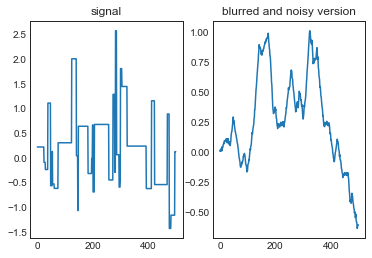

In [300]:
deblurring(k=50, sigma=0.01)

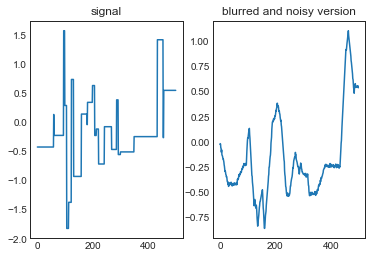

In [301]:
deblurring(k=30, sigma=0.01)

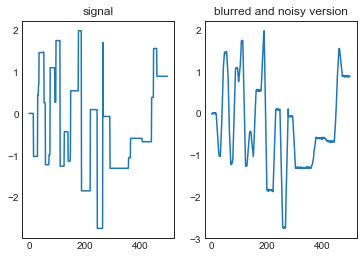

In [302]:
deblurring(k=10, sigma=0.01)

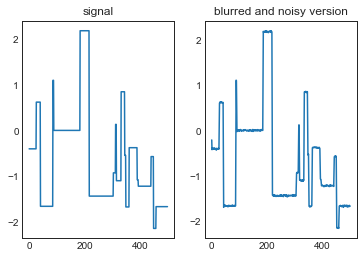

In [308]:
deblurring(k=2, sigma=0.01)

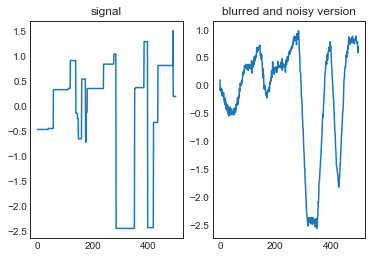

In [304]:
deblurring(k=30, sigma=0.05)

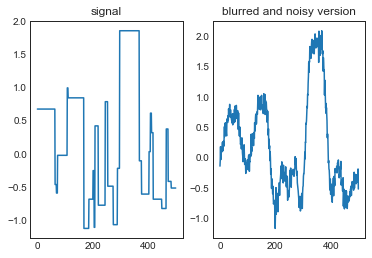

In [307]:
deblurring(k=30, sigma=0.1)

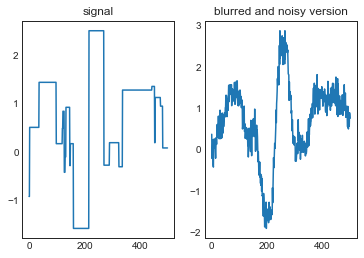

In [305]:
deblurring(k=30, sigma=0.2)

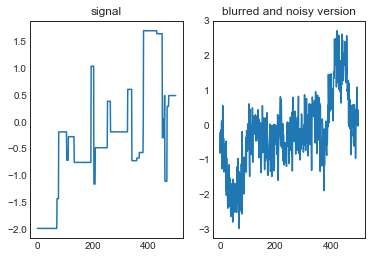

In [309]:
deblurring(k=30, sigma=0.5)